In [444]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
from io import StringIO
import re
import numpy as np
from datetime import datetime

sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (12, 3)
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize']= 22
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 2

In [3]:
store=pd.read_csv('../docker/csv/docker_images_store.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
community=pd.read_csv('../docker/csv/docker_images_com.csv', sep=',', dtype=object, index_col=None,  error_bad_lines=False)
store_tags=pd.read_csv('../docker/csv/docker_tags_store.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

# OFFICIAL IMAGES (not free included)

In [19]:
store.query('publisher=="Docker"')

,slug,type,created_at,updated_at,popularity,publisher,certification_status,name,operating_systems,categories
15,docker-docs,image,2017-03-22T18:45:25.510145Z,2017-05-11T19:01:11.661019Z,0,Docker,not_certified,Docker Docs,"linux,","tools,"
89,nginx,image,2017-04-19T13:50:01.539699Z,2017-12-19T17:47:54.778343Z,973846837,Docker,not_certified,nginx,"linux,","application_infrastructure,"
90,mongo,image,2016-06-17T23:29:50.117516Z,2017-12-19T17:48:04.027731Z,193138313,Docker,not_certified,mongo,"linux,windows,","database,"
91,wordpress,image,2016-06-03T16:25:08.35446Z,2017-12-19T17:47:50.132687Z,75702802,Docker,not_certified,wordpress,"linux,","application_services,"
92,php,image,2016-06-15T21:10:59.5901Z,2017-12-19T17:47:55.017806Z,69319838,Docker,not_certified,php,"linux,","languages,"
93,tomcat,image,2016-06-15T21:32:04.054684Z,2017-12-19T17:47:52.332319Z,37791107,Docker,not_certified,tomcat,"linux,","application_infrastructure,"
94,drupal,image,2016-06-16T19:35:03.088129Z,2017-12-19T17:47:59.673131Z,11151997,Docker,not_certified,drupal,"linux,","application_framework,"
95,sonarqube,image,2016-06-02T22:07:48.200631Z,2017-12-19T17:47:53.176454Z,8884960,Docker,not_certified,sonarqube,"linux,","tools,"
96,erlang,image,2016-06-01T23:32:04.578912Z,2017-12-19T17:47:51.929728Z,5120220,Docker,not_certified,erlang,"linux,","languages,"
97,eclipse-mosquitto,image,2017-04-17T14:41:12.833427Z,2017-12-19T17:47:59.902962Z,2939195,Docker,not_certified,eclipse-mosquitto,"linux,","application_services,"


In [11]:
len(store_tags.groupby('slug'))

122

In [15]:
store_tags.sort_values(['last_updated'], ascending=True)

,slug,tag,full_size,tag_id,last_updated,images
96,aerospike,3.6.2,58675954,1135396,2015-10-27T22:28:34.939798Z,1
12635,arangodb,2.6.9,124661323,1166269,2015-10-27T22:30:16.799069Z,1
10742,busybox,1.24.0,675456,1112440,2015-10-27T22:52:54.979903Z,1
10506,celery,3.1.18,84677670,128464,2015-10-27T23:11:43.464426Z,1
9836,docker,1.9.0-rc2,12123217,1174807,2015-10-28T00:05:15.202229Z,1
9835,docker,1.9.0-rc2-dind,14580968,1174822,2015-10-28T00:05:53.943564Z,1
9834,docker,1.9.0-rc2-git,20556971,1174842,2015-10-28T00:06:39.293636Z,1
10962,elasticsearch,2.0.0-rc1,223372213,1125058,2015-10-28T00:56:43.094457Z,1
11177,haproxy,1.5.14,42679039,526447,2015-10-28T02:31:16.399214Z,1
7177,java,openjdk-7u79-jdk,252206576,22187,2015-10-28T03:20:40.925933Z,1


In [12]:
store_tags.query('')

12843

# COMMUNITY IMAGES (not free included)

In [533]:
community.head(3)

,name,popularity
0,jangrewe/gitlab-ci-android,99983
1,aespinosa/jenkins,99980
2,aespinosa/jenkins,99980


# OFFICIAL IMAGE TAGS (only free)

In [3]:
#docker pull nginx:1.12-alpine-perl | grep -E '(Already exists|Pull complete)' | cut -d':' -f1
store_tags.head(3)

,slug,tag,full_size,tag_id,last_updated,images
0,couchbase,community-5.0.1,216795713,19602123,2017-12-19T04:46:34.031803Z,1
1,couchbase,community,216795713,170570,2017-12-19T04:46:33.718743Z,1
2,couchbase,enterprise-5.0.1,226825358,19602118,2017-12-19T04:46:21.139772Z,1


# Alpine packages

In [25]:
alpine_packages=pd.read_csv('../docker/csv/alpine_packages.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

In [6]:
alpine_packages.head(5)

,package,version,branch,repo,arch,bdate
0,xen-hypervisor,4.7.3-r3,v3.5,main,armhf,2018-01-05 10:40:01
1,xen-libs,4.7.3-r3,v3.5,main,armhf,2018-01-05 10:40:01
2,xen,4.7.3-r3,v3.5,main,armhf,2018-01-05 10:40:01
3,xen-dev,4.7.3-r3,v3.5,main,armhf,2018-01-05 10:40:00
4,xen-doc,4.7.3-r3,v3.5,main,armhf,2018-01-05 10:40:00


In [21]:
alpine_packages=alpine_packages.query('arch=="x86_64"').sort_values(['package','bdate'], ascending=True)
alpine_packages.head(2)

,package,version,branch,repo,arch,bdate
215731,3proxy,0.7.1.3-r1,edge,testing,x86_64,2016-04-25 10:50:01
215732,3proxy-doc,0.7.1.3-r1,edge,testing,x86_64,2016-04-25 10:50:01


In [20]:
alpine_last_release=alpine_packages.groupby(['package']).last().reset_index()
alpine_last_release.head()

,package,version,branch,repo,arch,bdate
0,3proxy,0.7.1.3-r1,edge,testing,x86_64,2016-04-25 10:50:01
1,3proxy-doc,0.7.1.3-r1,edge,testing,x86_64,2016-04-25 10:50:01
2,6tunnel,0.12-r1,v3.7,community,x86_64,2017-11-01 04:18:47
3,6tunnel-doc,0.12-r1,v3.7,community,x86_64,2017-11-01 04:18:46
4,R,3.4.3-r0,edge,community,x86_64,2017-12-03 14:22:43


In [174]:
# Cliff's Delta
from __future__ import division
 
def cliffsDelta(lst1,lst2,
                dull = [0.147, # small
                        0.33,  # medium
                        0.474 # large
                        ][0] ): 
  "Returns true if there are more than 'dull' differences"
  m, n = len(lst1), len(lst2)
  lst2 = sorted(lst2)
  j = more = less = 0
  for repeats,x in runs(sorted(lst1)):
    while j <= (n - 1) and lst2[j] <  x: 
      j += 1
    more += j*repeats
    while j <= (n - 1) and lst2[j] == x: 
      j += 1
    less += (n - j)*repeats
  d= (more - less) / (m*n)
  f=abs(d)  > dull
  print("d="+str(d)+' '+str(f))
  return abs(d)  > dull
   
def runs(lst):
  "Iterator, chunks repeated values"
  for j,two in enumerate(lst):
    if j == 0:
      one,i = two,0
    if one!=two:
      yield j - i,one
      i = j
    one=two
  yield j - i + 1,two
  
def _cliffsDelta():
  "demo function"
  lst1=[1,2,3,4,5,6,7]
  for r in [1.01,1.1,1.21, 1.5, 2]:
    lst2=map(lambda x: x*r,lst1)
    #return lst2
    print(lst2,cliffsDelta(lst1,lst2)) # should return False

# Packages used in docker images that are based on Alpine:
# 43 official images and 2253 tags

In [474]:
df_final=pd.read_csv('../docker/csv/docker_package_alpine_final.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)
df_final_15jan=pd.read_csv('../docker/csv/docker_package_alpine_15jan.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

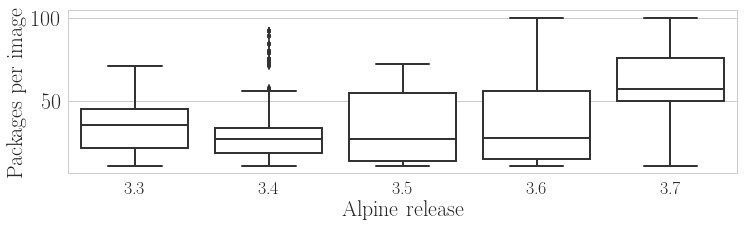

In [478]:
df_final= df_final.query('alpine_release>"3.3.0"')

df_final['alpine_release2']=df_final['alpine_release'].apply(lambda x: str(x).split('.')[0]+'.'+str(x).split('.')[1])
df=df_final.groupby(['alpine_release2','tag_id']).count().reset_index()
ax = sns.boxplot( y='slug', x="alpine_release2", data=df, color='white', saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Packages per image')
ax.set_xlabel('Alpine release')
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.2')
#ax.set_ylim(0,1010)
#ax.set_yscale('log')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)
ax.figure.savefig('../../seneca_research/SHORT_MSR2018/figures/package_image.png', bbox_inches='tight', facecolor='white')

In [484]:
len(df_final.groupby(['package','package_version']).count())

852

In [333]:
# Creation date extracted from github
creation=pd.read_csv('../docker/csv/date_creation.csv', sep=';', dtype=object, index_col='image',  error_bad_lines=False)
creation.head(2)

,date
image,
adminer,2016-10-13
aerospike,2015-01-27


In [422]:
df_final_15jan=df_final_15jan.loc[:,['tag_id','package','package_version_2','last_updated_2']]
true_final=pd.concat([df_final.set_index(['tag_id','package']),df_final_15jan.set_index(['tag_id','package'])], axis=1)
true_final.dropna(inplace=True)
true_final.reset_index(inplace=True)
true_final=true_final.query('in_alpine=="True"').query('bdate!="undefined"')
true_final=true_final.drop('bdate',1)

#len(df_final.query('in_alpine=="True"').query('bdate=="undefined"'))
#len(true_final.query('bdate>last_updated'))

alpine_packages=alpine_packages.query('arch=="x86_64"').sort_values(['package','bdate'], ascending=True)

# number of the latest version
alpine_packages_32=alpine_packages.groupby(['package','version']).last().reset_index()
alpine_packages_32=alpine_packages_32.sort_values(['package','bdate'], ascending=True)
alpine_packages_32['p_order_new'] = alpine_packages_32.groupby(['package']).cumcount()+1

alpine_packages_32=alpine_packages_32.sort_values(['package','bdate'], ascending=True)
alpine_last_release=alpine_packages_32.groupby(['package']).last().reset_index()

dff=alpine_last_release.loc[:,['bdate','package','p_order_new']]
dff.rename(columns = {'bdate':'bdate_new'}, inplace=True)

next_2=true_final.set_index(['package']).merge(dff.set_index(['package']), left_index=True, right_index=True)

# number of the package version
alpine_packages_32=alpine_packages.groupby(['package','version']).first().reset_index()
alpine_packages_32=alpine_packages_32.sort_values(['package','bdate'], ascending=True)
alpine_packages_32['p_order'] = alpine_packages_32.groupby(['package']).cumcount()+1
alpine_packages_32=alpine_packages_32.loc[:,['package','version','p_order','bdate']]
alpine_packages_32.rename(columns = {'version':'package_version'}, inplace=True)
alpine_packages_32=alpine_packages_32.sort_values(['package','bdate'], ascending=True)

next_2.reset_index(inplace=True)
next_2=next_2.set_index(['package','package_version']).merge(alpine_packages_32.set_index(['package','package_version']), left_index=True, right_index=True)


next_2.reset_index(inplace=True)
next_2['last_updated']=next_2['last_updated'].apply(lambda x: str(x).split('T')[0])
next_2['last_updated_2']=next_2['last_updated_2'].apply(lambda x: str(x).split('T')[0])

next_2['bdate']=next_2['bdate'].apply(lambda x: str(x).split(' ')[0])
next_2['bdate_new']=next_2['bdate_new'].apply(lambda x: str(x).split(' ')[0])

next_2['last updated lag']=pd.to_datetime(next_2['last_updated'])- pd.to_datetime(next_2['bdate'])
next_2['last updated lag']=next_2['last updated lag'].apply(lambda x: int(str(x).split(' ')[0]))

next_2['time lag']=pd.to_datetime(next_2['bdate_new'])- pd.to_datetime(next_2['bdate'])
next_2['time lag']=next_2['time lag'].apply(lambda x: int(str(x).split(' ')[0]))

next_2['last updated newLag']=pd.to_datetime(next_2['last_updated'])- pd.to_datetime(next_2['bdate_new'])
next_2['last updated newLag']=next_2['last updated newLag'].apply(lambda x: int(str(x).split(' ')[0]))

next_2['version lag']=next_2['p_order_new']- next_2['p_order'] +1
next_2['version lag']=next_2['version lag'].apply(float)


next_2= next_2.query('alpine_release>"3.3.0"')
next_2['alpine_release2']=next_2['alpine_release'].apply(lambda x: str(x).split('.')[0]+'.'+str(x).split('.')[1])

next_2=next_2.query('bdate<=bdate_new').query('bdate<last_updated')
#next_2=next_2.set_index('slug').merge(creation, left_index=True, right_index=True)
#next_2.reset_index(inplace=True)
next_2.dropna(inplace=True)
len(next_2)

63581

In [416]:
len(df_final)

82949

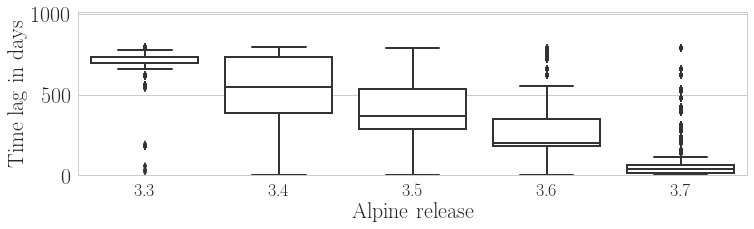

In [456]:
ax = sns.boxplot( y='time lag', x="alpine_release2", color='white', data=next_2)#, split=True)#, order=order)    
ax.set_ylabel('Time lag in days')
ax.set_xlabel('Alpine release')
ax.set_ylim(0,1010)
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.2')
#ax.set_yscale('log')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)
ax.figure.savefig('../../seneca_research/SHORT_MSR2018/figures/time_lag_alpine.pdf', bbox_inches='tight', facecolor='white')

In [243]:
for x in ['3.3','3.4','3.5','3.6','3.7']:
    print(next_2.query('alpine_release2=="'+x+'"')['time lag'].median(), 'median',x)
    print(next_2.query('alpine_release2=="'+x+'"')['time lag'].mean(), 'mean',x)

733.0 median 3.3
728.849206349 mean 3.3
550.0 median 3.4
538.755654011 mean 3.4
371.0 median 3.5
435.079342387 mean 3.5
203.0 median 3.6
287.554683841 mean 3.6
42.0 median 3.7
133.864395307 mean 3.7


In [242]:
cliffsDelta(next_2.query('year=="2018"')['version lag'].values,
            next_2.query('year=="2017"')['version lag'].values)

d=-0.41818969133026546 True


True

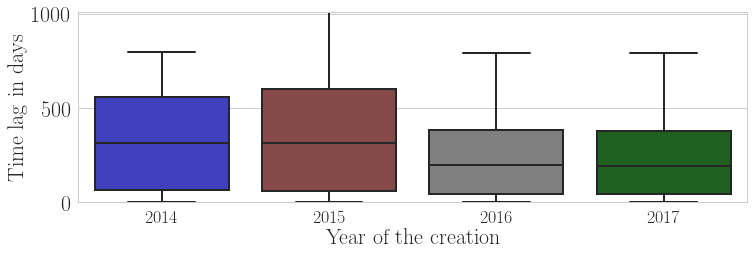

In [397]:
next_2['year']=next_2['date'].apply(lambda x: str(x).split('-')[0])
ax = sns.boxplot( y='time lag', x="year", data=next_2, palette=['blue','brown','gray','green','orange'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Time lag in days')
ax.set_xlabel('Year of the creation')
ax.set_ylim(0,1010)
#ax.set_yscale('log')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3.5)

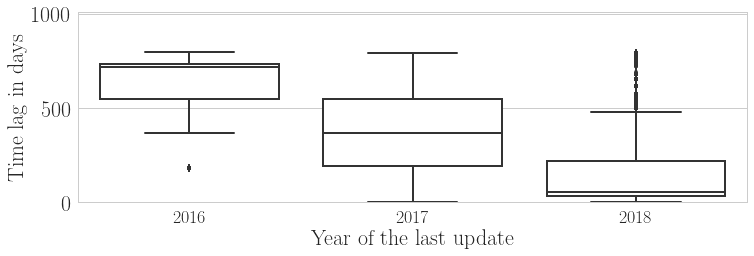

In [512]:
next_2['year']=next_2['last_updated_2'].apply(lambda x: str(x).split('-')[0])
ax = sns.boxplot( y='time lag', x="year", data=next_2, color='white', saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Time lag in days')
ax.set_xlabel('Year of the last update')
ax.set_ylim(0,1010)
#ax.set_yscale('log')
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3.5)
#ax.figure.savefig('../../seneca_research/SHORT_MSR2018/figures/time_lag_year.png', bbox_inches='tight', facecolor='white')

In [519]:
next_2.query('year=="2016"')['time lag'].mean()

663.09602507479701

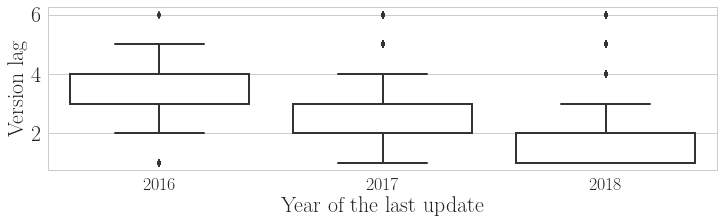

In [466]:
ax = sns.boxplot( y='version lag', x="year", data=next_2, color='white', saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Version lag')
ax.set_xlabel('Year of the last update')
#ax.set_ylim(0,1010)
#ax.set_yscale('log')
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)
ax.figure.savefig('../../seneca_research/SHORT_MSR2018/figures/version_lag.png', bbox_inches='tight', facecolor='white')

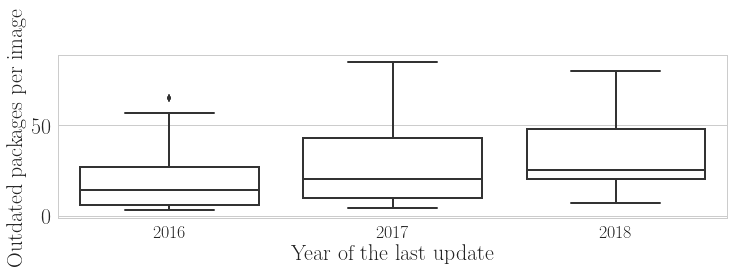

In [469]:
next_2['year']=next_2['last_updated_2'].apply(lambda x: str(x).split('-')[0])
next_2=next_2.query('bdate<bdate_new')
df=next_2.groupby(['tag_id','year','slug']).count().reset_index()
ax = sns.boxplot( y='package', x="year", data=df, color='white', saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Outdated packages per image')
ax.set_xlabel('Year of the last update')
plt.setp(ax.lines, color=".2", mfc='.2', mec='.2')
for x in ax.artists:
    x.set_edgecolor('.2')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)
ax.figure.savefig('../../seneca_research/SHORT_MSR2018/figures/image_lag.pdf', bbox_inches='tight', facecolor='white')

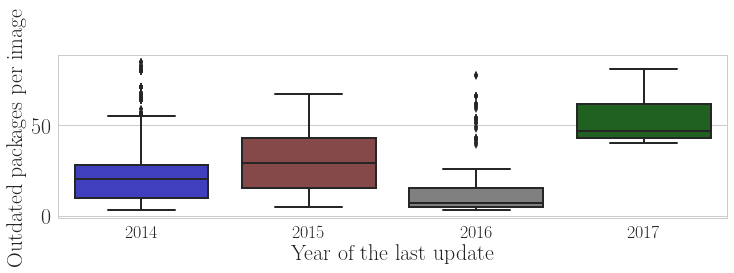

In [378]:
next_2['year']=next_2['date'].apply(lambda x: str(x).split('-')[0])
next_2=next_2.query('bdate<bdate_new')
df=next_2.groupby(['tag_id','year','index']).count().reset_index()
ax = sns.boxplot( y='package', x="year", data=df, palette=['blue','brown','gray','green','orange'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Outdated packages per image')
ax.set_xlabel('Year of the last update')
#ax.set_ylim(0,1010)
#ax.set_yscale('log')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)

In [283]:
df=next_2.groupby(['slug','tag_id']).count().reset_index().groupby('slug').count().sort_values(['package'], ascending=False)
df=df.loc[:,['package']]
dg=next_2.groupby(['slug']).count().sort_values(['package'], ascending=False)
dg=dg.loc[:,['tag_id']]
dfg=pd.concat([df,dg], axis=1).reset_index()
dfg['package_image']=dfg['tag_id']/dfg['package']
dfg.sort_values(['package_image'], ascending=False)

,index,package,tag_id,package_image
12,haxe,14,840,60.000000
39,tomcat,157,9007,57.369427
35,solr,40,2157,53.925000
2,clojure,17,895,52.647059
10,groovy,98,5114,52.183673
9,gradle,112,5710,50.982143
28,openjdk,39,1885,48.333333
24,maven,47,2114,44.978723
36,sonarqube,22,989,44.954545
23,logstash,32,1435,44.843750


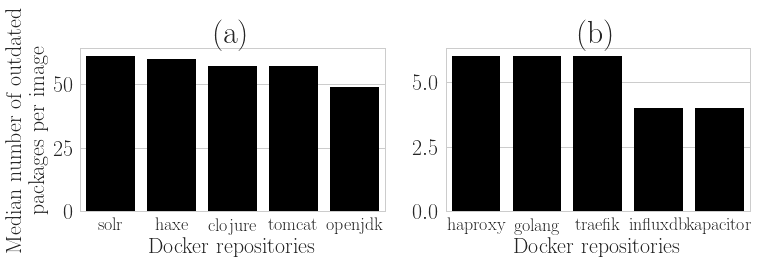

In [511]:
#df=next_2.groupby(['slug','tag_id']).count().reset_index().groupby('slug').count().sort_values(['package'], ascending=False)
#df=df.loc[:,['package']]
#dg=next_2.groupby(['slug']).count().sort_values(['package'], ascending=False)
#dg=dg.loc[:,['tag_id']]
#dfg=pd.concat([df,dg], axis=1).reset_index()
#dfg['package_image']=dfg['tag_id']/dfg['package']
# PLot

dfg=next_2.groupby(['slug','tag_id']).count().reset_index().groupby('slug').median().reset_index()
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
dff=dfg.sort_values(['package'], ascending=False).head(5)

ax = sns.barplot(ax=axes[0], x="slug", y="package", data=dff, palette=['black'], saturation=0.5 )
#ax=a.plot(kind='bar', y='package', color='gray')
ax.figure.set_size_inches(12,3)
ax.set_xlabel('Docker repositories')
ax.set_ylabel('Median number of outdated \n packages per image')
ax.set_title('(a)')

dff=dfg.sort_values(['package'], ascending=False).tail(5)

ax = sns.barplot(ax=axes[1], x="slug", y="package", data=dff, palette=['black'], saturation=0.5 )
#ax=a.plot(kind='bar', y='package', color='gray')
ax.figure.set_size_inches(12,3)
ax.set_xlabel('Docker repositories')
ax.set_ylabel('')
ax.set_title('(b)')

ax.figure.savefig('../../seneca_research/SHORT_MSR2018/figures/top5.pdf', bbox_inches='tight', facecolor='white')

In [506]:
df=next_2.groupby(['slug','tag_id']).count().reset_index().groupby('slug').median().reset_index()

df

,slug,package,package_version,tag,full_size,last_updated,images,alpine_release,in_alpine,package_version_2,...,bdate_new,p_order_new,p_order,bdate,last updated lag,time lag,last updated newLag,version lag,alpine_release2,year
0,alpine,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
1,chronograf,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,clojure,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,...,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0
3,drupal,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
4,elasticsearch,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
5,elixir,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
6,erlang,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
7,ghost,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
8,golang,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
9,gradle,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0


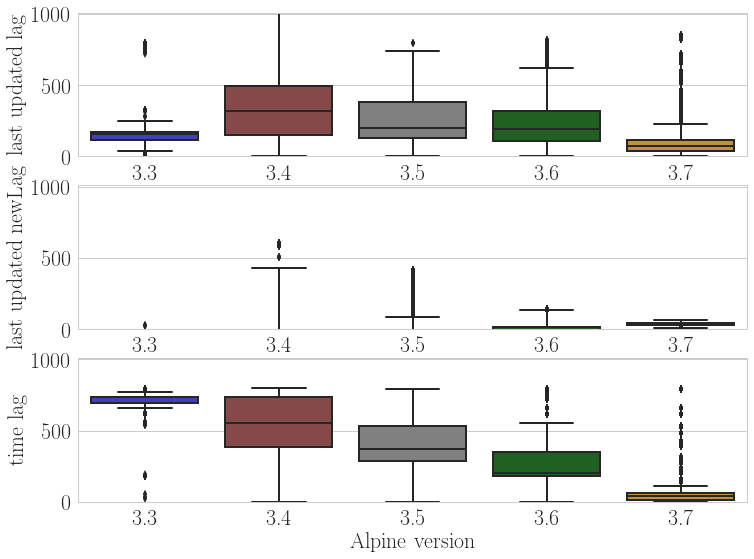

In [315]:
fig, axes = plt.subplots(3, 1, sharex=False, sharey=True)
for index, time in enumerate(['last updated lag','last updated newLag','time lag']):                        
    ax = sns.boxplot(ax=axes[index], y=time, x="alpine_release2", data=next_2, palette=['blue','brown','gray','green','orange'], saturation=0.5)#, split=True)#, order=order)    
    ax.set_ylabel(time)
    ax.set_xlabel('Alpine version')
    ax.set_ylim(0,1010)
    #ax.set_yscale('log')
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,9)

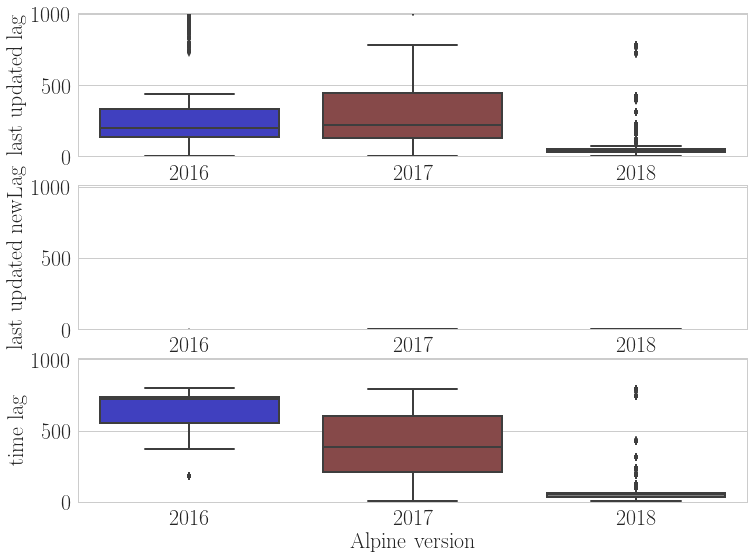

In [341]:
next_2['year']=next_2['last_updated_2'].apply(lambda x: str(x).split('-')[0])
fig, axes = plt.subplots(3, 1, sharex=False, sharey=True)
for index, time in enumerate(['last updated lag','last updated newLag','time lag']):                        
    ax = sns.boxplot(ax=axes[index], y=time, x="year", data=next_2.query('last_updated<bdate_new'), palette=['blue','brown','gray','green','orange'], saturation=0.5)#, split=True)#, order=order)    
    ax.set_ylabel(time)
    ax.set_xlabel('Alpine version')
    ax.set_ylim(0,1010)
    #ax.set_yscale('log')
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,9)

In [118]:
next_2['update_difference']=pd.to_datetime(next_2['last_updated_2'])- pd.to_datetime(next_2['last_updated'])
next_2['update_difference']=next_2['update_difference'].apply(lambda x: int(str(x).split(' ')[0]))

In [129]:
next_2.query('update_difference>0').groupby(['tag_id','update_difference']).count().reset_index().update_difference.mean()

26.94927536231884

In [173]:
next_2.sort_values(['last_updated_2'], ascending=False).last_updated_2

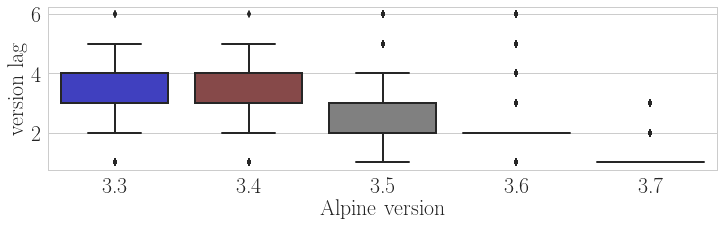

In [323]:
ax = sns.boxplot( y='version lag', x="alpine_release2", data=next_2, palette=['blue','brown','gray','green','orange'], saturation=0.5)#, split=True)#, order=order)    
ax.set_ylabel('Version lag')
ax.set_xlabel('Alpine version')
#ax.set_ylim(0,1010)
#ax.set_yscale('log')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=15,ncol=3, fancybox=True, shadow=True)
ax.figure.set_size_inches(12,3)